In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

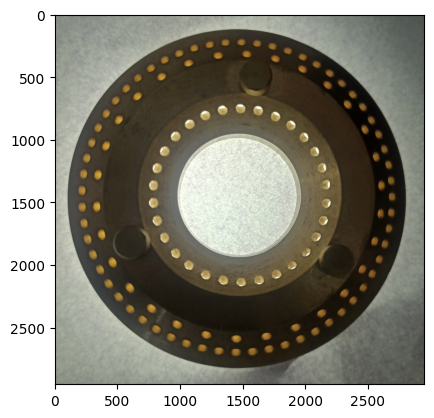

In [53]:
img = cv2.imread("new_image.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
# #image grayscale conversion
    

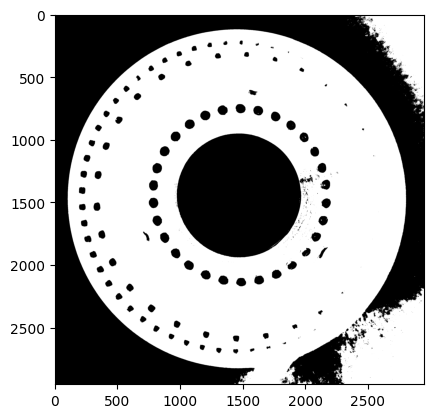

In [54]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary_img = cv2.threshold(gray,100, 255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(binary_img,cmap = 'gray')

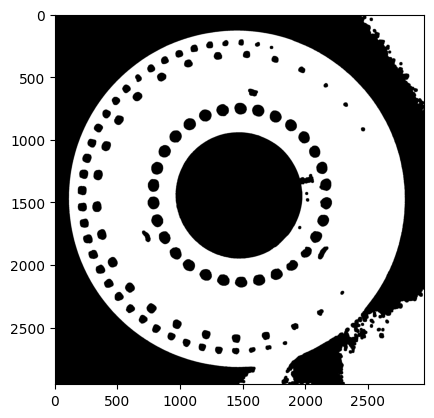

In [55]:
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE,
                            kernel, iterations = 2)
  
# Background area using Dilation
bg = cv2.dilate(closing, kernel, iterations = 1)
  
# Finding foreground area
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0)
_, fg = cv2.threshold(dist_transform, 0.02
                        * dist_transform.max(), 255, 0)
plt.imshow(fg,cmap = 'gray')

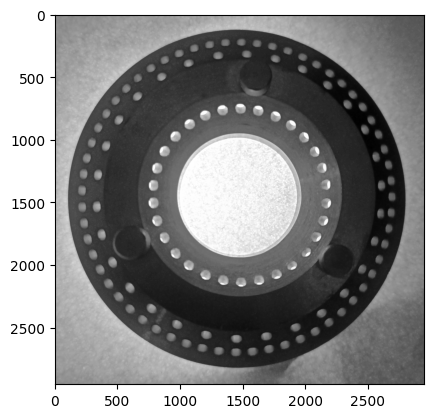

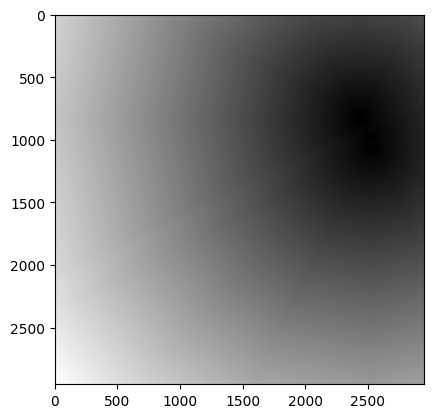

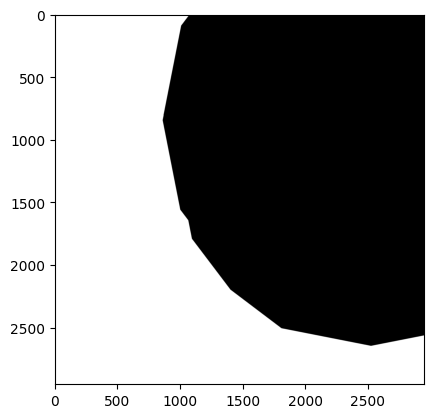

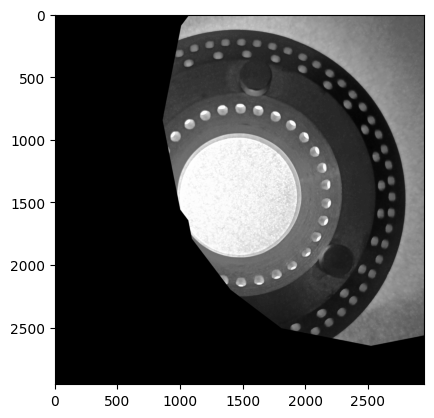

In [56]:
sure_bg = cv2.dilate(gray, kernel, iterations=3)
plt.imshow(sure_bg,cmap = 'gray')
plt.show()

dist = cv2.distanceTransform(gray, cv2.DIST_L2, 5)
plt.imshow(dist , cmap='gray')
plt.show()

#foreground area
_, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8) 
plt.imshow(sure_fg , cmap='gray')
plt.show()

unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown , cmap= 'gray')
plt.show()


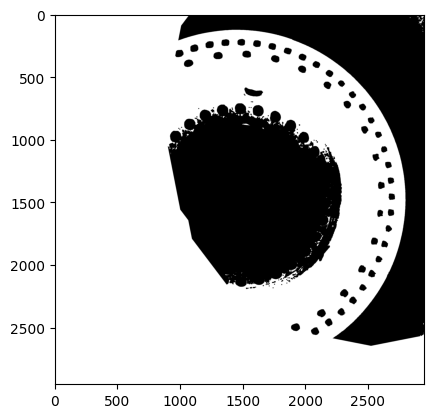

In [57]:
_, final = cv2.threshold(unknown,100, 255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(final,cmap = 'gray')

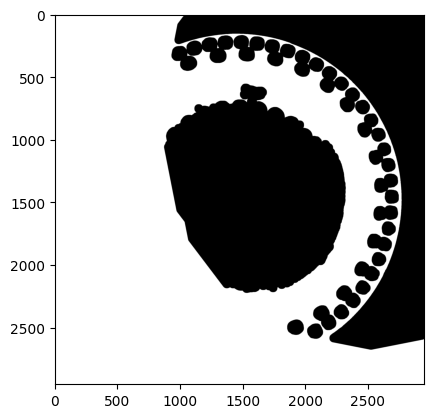

In [58]:
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(final, cv2.MORPH_CLOSE,
                            kernel, iterations = 2)
  
# Background area using Dilation
bg = cv2.dilate(closing, kernel, iterations = 1)
  
# Finding foreground area
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0)
_, fg = cv2.threshold(dist_transform, 0.02
                        * dist_transform.max(), 255, 0)
plt.imshow(fg,cmap = 'gray')